In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Ad 1 Selected 4 times
Ad 2 Selected 46 times
Ad 3 Selected 28 times
Ad 4 Selected 56 times
Ad 5 Selected 9040 times
Ad 6 Selected 34 times
Ad 7 Selected 114 times
Ad 8 Selected 511 times
Ad 9 Selected 104 times
Ad 10 Selected 63 times


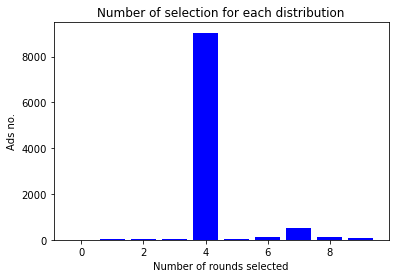

In [36]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
# CTR adalah Click Through Rate
# setiap row menunjukkan user ke-i dan kolom menunjukkan iklan ke-j (terdapat 10000 user dan 10 iklan)
# df[i][j] = 1 jika user ke-i mengklik iklan ke-j
# df[i][j] = 0 jika user ke-i tidak mengklik iklan ke-j
# dalam setiap sequence ke-i, mesin akan mendapatkan outcome user ke-i

# Implementing UCB
D = 10 # Total possible distribution (ads)
T = 10000 # Total rounds (users)
R = [0] * D # Total reward for each distribution
N = [0] * D # Total number of selection for each distribution

for t in range(D) :
    R[t] = df.values[0, t]
    N[t] = 1

for t in range(10,T):
    # variable calculation
    r_bar = [R[t]/N[t] for t in range(D)]
    delta = [np.sqrt(3/2 * np.log(t+1)/N[t]) for t in range(D)]
    upper_bound = [r_bar[t] + delta[t] for t in range(D)]

    # distribution selection
    select = np.argmax(upper_bound)
    R[select] += df.values[t, select]
    N[select] += 1

[print("Ad", i+1, "Selected", N[i], "times") for i in range(len(N))]

# Visualising the results
plt.bar(range(D), N, color='blue')
plt.title('Number of selection for each distribution')
plt.xlabel('Number of rounds selected')
plt.ylabel('Ads no.')
plt.show()
